평가방식 : mean absolute error (MAE)

구조 설명
- 이번 대회에서 분석할 소자는 질화규소(layer_1)/이산화규소(layer_2)/질화규소(layer_3)/이산화규소(layer_4)/규소(기판) 총 5층 구조로 되어 있습니다. 대회의 목적은 기판인 규소를 제외한 layer_1 ~ layer_4의 두께를 예측하는 것으로 train.csv 파일에는 각 층의 두께와 반사율 스펙트럼이 포함되어 있습니다.

데이터 
- layer_1~4 : 해당 박막의 두께
- 0~225 : 반사율 스펙트럼, 빛의 파장은 비식별화되어 제공된다.

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 999) # 컬럼갯수

In [2]:
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')

In [3]:
print(train_df.shape)
train_df.head()

(810000, 230)


,layer_1,layer_2,layer_3,layer_4,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225
0,10,10,10,10,0.254551,0.258823,0.254659,0.252085,0.247678,0.253614,0.246511,0.259407,0.260862,0.242524,0.253870,0.245156,0.245548,0.255501,0.228948,0.228632,0.225802,0.249418,0.246910,0.248747,0.251088,0.244886,0.233906,0.242632,0.221792,0.236521,0.220555,0.243761,0.230202,0.226122,0.220671,0.235075,0.224560,0.226998,0.209499,0.226594,0.225476,0.224669,0.233551,0.224695,0.214059,0.215451,0.222333,0.202142,0.219397,0.218482,0.203569,0.200052,0.204668,0.205163,0.210409,0.205481,0.221073,0.193407,0.195662,0.193293,0.207151,0.194120,0.199404,0.191580,0.187853,0.185392,0.200859,0.184270,0.185017,0.189149,0.201704,0.178829,0.200114,0.176768,0.202258,0.185935,0.200251,0.188061,0.191104,0.169006,0.175374,0.169496,0.173800,0.167452,0.172431,0.174298,0.162710,0.180574,0.175767,0.165693,0.172443,0.158489,0.172004,0.181759,0.162470,0.172063,0.155012,0.171733,0.158018,0.153949,0.165214,0.147266,0.170829,0.145234,0.164719,0.151643,0.164846,0.170996,0.148866,0.158070,0.157883,0.156614,0.145529,0.167061,0.151388,0.162956,0.158071,0.145496,0.160881,0.148179,0.162632,0.153460,0.162362,0.156548,0.157694,0.151111,0.164965,0.155728,0.149260,0.154921,0.138105,0.147493,0.159195,0.148970,0.159782,0.155037,0.147596,0.154287,0.164378,0.167029,0.168657,0.173257,0.175540,0.169369,0.184006,0.169240,0.172977,0.188885,0.188956,0.188983,0.168166,0.188366,0.178189,0.183270,0.154747,0.174022,0.151023,0.163006,0.144926,0.163576,0.159313,0.149224,0.141561,0.128726,0.145124,0.135836,0.143166,0.146841,0.149541,0.145434,0.119599,0.129756,0.140655,0.123685,0.134774,0.121456,0.126664,0.122108,0.146444,0.130366,0.135187,0.153986,0.148589,0.130125,0.136006,0.151720,0.152425,0.144325,0.167494,0.160129,0.160126,0.164192,0.171406,0.162364,0.168591,0.166626,0.169696,0.196383,0.194145,0.190646,0.186797,0.191748,0.190886,0.208518,0.211220,0.229286,0.226265,0.226954,0.229023,0.237112,0.262421,0.262566,0.272062,0.292049,0.305353,0.292889,0.317479,0.316911,0.321371,0.355636,0.354750,0.369223,0.388184,0.408496,0.414564,0.429403,0.419225,0.443250,0.433414,0.465502
1,10,10,10,20,0.205062,0.225544,0.217758,0.202169,0.199633,0.207380,0.191318,0.195369,0.200536,0.197588,0.198726,0.191803,0.199625,0.206465,0.182836,0.193341,0.180459,0.196416,0.185398,0.188913,0.176011,0.173457,0.182249,0.176816,0.192716,0.185924,0.183816,0.186900,0.161040,0.173525,0.172948,0.182634,0.161153,0.158073,0.152335,0.148293,0.173913,0.164630,0.166498,0.149946,0.157480,0.140385,0.151373,0.164423,0.159819,0.142183,0.159111,0.135754,0.155538,0.153764,0.147988,0.141430,0.147157,0.128320,0.143349,0.134982,0.115491,0.123907,0.116343,0.139515,0.122887,0.121952,0.124709,0.115172,0.106789,0.125669,0.105336,0.113389,0.103389,0.098193,0.119512,0.121378,0.119641,0.116655,0.111344,0.096858,0.088048,0.096452,0.089945,0.085686,0.082047,0.100776,0.078251,0.099588,0.079823,0.076646,0.075789,0.091981,0.078182,0.082409,0.085509,0.093576,0.088663,0.074196,0.069241,0.066174,0.072723,0.070791,0.075919,0.082080,0.081874,0.069062,0.071412,0.065123,0.082904,0.060860,0.079682,0.081916,0.081820,0.066513,0.070069,0.076625,0.067492,0.070690,0.066154,0.074697,0.063112,0.086417,0.065787,0.079910,0.074906,0.084334,0.097133,0.08

In [4]:
print(test_df.shape)
test_df.head()

(10000, 227)


,id,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225
0,0,0.535410,0.520775,0.494087,0.465134,0.430339,0.401751,0.355986,0.326427,0.282340,0.216756,0.181081,0.128061,0.090104,0.071084,0.027930,0.025360,0.035067,0.084959,0.119919,0.167098,0.219223,0.264180,0.303416,0.359825,0.383026,0.437603,0.457129,0.511524,0.525033,0.544154,0.558287,0.588944,0.591619,0.604344,0.594368,0.616329,0.617499,0.616428,0.622483,0.608188,0.589408,0.579811,0.572689,0.535276,0.531884,0.506720,0.463794,0.428374,0.397188,0.358233,0.320985,0.271494,0.241959,0.170666,0.133295,0.097977,0.088037,0.062212,0.066572,0.069299,0.086092,0.111821,0.160620,0.180033,0.217358,0.257005,0.302687,0.309737,0.357228,0.356120,0.399767,0.397478,0.421747,0.415379,0.420101,0.395504,0.395155,0.378241,0.367109,0.340878,0.321535,0.294862,0.251011,0.233811,0.192675,0.147237,0.122587,0.084800,0.085742,0.097255,0.095726,0.138646,0.168029,0.240509,0.287566,0.345314,0.416404,0.454278,0.528662,0.548380,0.607686,0.629263,0.672402,0.704309,0.704186,0.732075,0.747648,0.759551,0.759334,0.789642,0.780827,0.797476,0.795992,0.785202,0.800730,0.786542,0.797836,0.783744,0.785836,0.771139,0.761042,0.740651,0.737801,0.708574,0.678409,0.656223,0.606936,0.579049,0.548710,0.492235,0.453975,0.399819,0.346249,0.314887,0.299802,0.293525,0.303287,0.331058,0.367460,0.402818,0.461104,0.488451,0.530605,0.580132,0.608629,0.631929,0.630750,0.666776,0.668374,0.681298,0.656742,0.676088,0.649166,0.653360,0.624414,0.627899,0.603772,0.568674,0.530422,0.481103,0.455072,0.398145,0.354418,0.305315,0.257106,0.208718,0.150469,0.144564,0.158061,0.161681,0.208233,0.240214,0.295370,0.341098,0.413017,0.439993,0.482450,0.533209,0.554202,0.556905,0.578959,0.606174,0.613974,0.608783,0.630806,0.618124,0.608499,0.598381,0.586389,0.552573,0.527883,0.488114,0.445729,0.418668,0.354205,0.280794,0.201839,0.131517,0.062330,0.028610,0.008230,0.036909,0.076047,0.141627,0.219861,0.305271,0.402317,0.465201,0.527406,0.590492,0.637339,0.649940,0.692388,0.703576,0.714609,0.750994,0.748339,0.757575,0.768130,0.777062,0.769173,0.768253,0.738704,0.739460,0.702139,0.702238
1,1,0.351099,0.398179,0.413809,0.418529,0.433257,0.455410,0.451065,0.464230,0.476011,0.477219,0.480153,0.472766,0.477897,0.479871,0.449263,0.450770,0.426963,0.430181,0.404833,0.392706,0.363237,0.343717,0.335713,0.314341,0.315998,0.297495,0.287035,0.285863,0.260355,0.278014,0.287343,0.311354,0.308082,0.326284,0.344012,0.364763,0.415674,0.431457,0.457605,0.464115,0.493231,0.495945,0.524833,0.553802,0.563072,0.557222,0.583854,0.568150,0.593560,0.595349,0.591010,0.583719,0.586454,0.562245,0.569383,0.550440,0.517482,0.509301,0.481702,0.481169,0.436910,0.404312,0.371222,0.321732,0.269649,0.241872,0.173532,0.134474,0.081277,0.040317,0.036955,0.028315,0.032036,0.050546,0.080932,0.113121,0.158131,0.223743,0.274684,0.325786,0.374019,0.440192,0.460344,0.519596,0.533244,0.559256,0.583691,0.621637,0.626404,0.646338,0.662477,0.681132,0.684532,0.676257,0.675456,0.674547,0.681279,0.677541,0.678834,0.679028,0.670592,0.647120,0.636174,0.613718,0.612165,0.567306,0.559505,0.531014,0.495852,0.441048,0.400873,0.360074,0.301190,0.254231,0.201824,0.168437,0.124694,0.128963,0.104490,0.130171,0.150546,0.195963,0.251567,0.289690,0.319199,0.376656,0.422724,0.462960,0.502195

In [5]:
# 갯수, 평균값, 분산값, 4분위수(최소, 25,50,75 ,최대)
# 파장번호에 따른 반사율값은 0~1사이로 되어있어야하나, -0.014902 로 음수형태의 값이 나옴 -> 데이콘에서는 정상데이터로 본다고 함(아마도 노이즈로 예상.)

train_df.describe()

,layer_1,layer_2,layer_3,layer_4,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225
count,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810

In [6]:
# layer1 ~ 4만 분리해서 확인
# 질화규소(layer_1)/이산화규소(layer_2)/질화규소(layer_3)/이산화규소(layer_4)
train_df.iloc[:,:4]

,layer_1,layer_2,layer_3,layer_4
0,10,10,10,10
1,10,10,10,20
2,10,10,10,30
3,10,10,10,40
4,10,10,10,50
...,...,...,...,...
809995,300,300,300,260
809996,300,300,300,270
809997,300,300,300,280
809998,300,300,300,290


In [7]:
# 0 ~ 225 파장번호에 따른 값 확인
train_df.iloc[:,4:]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225
0,0.254551,0.258823,0.254659,0.252085,0.247678,0.253614,0.246511,0.259407,0.260862,0.242524,0.253870,0.245156,0.245548,0.255501,0.228948,0.228632,0.225802,0.249418,0.246910,0.248747,0.251088,0.244886,0.233906,0.242632,0.221792,0.236521,0.220555,0.243761,0.230202,0.226122,0.220671,0.235075,0.224560,0.226998,0.209499,0.226594,0.225476,0.224669,0.233551,0.224695,0.214059,0.215451,0.222333,0.202142,0.219397,0.218482,0.203569,0.200052,0.204668,0.205163,0.210409,0.205481,0.221073,0.193407,0.195662,0.193293,0.207151,0.194120,0.199404,0.191580,0.187853,0.185392,0.200859,0.184270,0.185017,0.189149,0.201704,0.178829,0.200114,0.176768,0.202258,0.185935,0.200251,0.188061,0.191104,0.169006,0.175374,0.169496,0.173800,0.167452,0.172431,0.174298,0.162710,0.180574,0.175767,0.165693,0.172443,0.158489,0.172004,0.181759,0.162470,0.172063,0.155012,0.171733,0.158018,0.153949,0.165214,0.147266,0.170829,0.145234,0.164719,0.151643,0.164846,0.170996,0.148866,0.158070,0.157883,0.156614,0.145529,0.167061,0.151388,0.162956,0.158071,0.145496,0.160881,0.148179,0.162632,0.153460,0.162362,0.156548,0.157694,0.151111,0.164965,0.155728,0.149260,0.154921,0.138105,0.147493,0.159195,0.148970,0.159782,0.155037,0.147596,0.154287,0.164378,0.167029,0.168657,0.173257,0.175540,0.169369,0.184006,0.169240,0.172977,0.188885,0.188956,0.188983,0.168166,0.188366,0.178189,0.183270,0.154747,0.174022,0.151023,0.163006,0.144926,0.163576,0.159313,0.149224,0.141561,0.128726,0.145124,0.135836,0.143166,0.146841,0.149541,0.145434,0.119599,0.129756,0.140655,0.123685,0.134774,0.121456,0.126664,0.122108,0.146444,0.130366,0.135187,0.153986,0.148589,0.130125,0.136006,0.151720,0.152425,0.144325,0.167494,0.160129,0.160126,0.164192,0.171406,0.162364,0.168591,0.166626,0.169696,0.196383,0.194145,0.190646,0.186797,0.191748,0.190886,0.208518,0.211220,0.229286,0.226265,0.226954,0.229023,0.237112,0.262421,0.262566,0.272062,0.292049,0.305353,0.292889,0.317479,0.316911,0.321371,0.355636,0.354750,0.369223,0.388184,0.408496,0.414564,0.429403,0.419225,0.443250,0.433414,0.465502
1,0.205062,0.225544,0.217758,0.202169,0.199633,0.207380,0.191318,0.195369,0.200536,0.197588,0.198726,0.191803,0.199625,0.206465,0.182836,0.193341,0.180459,0.196416,0.185398,0.188913,0.176011,0.173457,0.182249,0.176816,0.192716,0.185924,0.183816,0.186900,0.161040,0.173525,0.172948,0.182634,0.161153,0.158073,0.152335,0.148293,0.173913,0.164630,0.166498,0.149946,0.157480,0.140385,0.151373,0.164423,0.159819,0.142183,0.159111,0.135754,0.155538,0.153764,0.147988,0.141430,0.147157,0.128320,0.143349,0.134982,0.115491,0.123907,0.116343,0.139515,0.122887,0.121952,0.124709,0.115172,0.106789,0.125669,0.105336,0.113389,0.103389,0.098193,0.119512,0.121378,0.119641,0.116655,0.111344,0.096858,0.088048,0.096452,0.089945,0.085686,0.082047,0.100776,0.078251,0.099588,0.079823,0.076646,0.075789,0.091981,0.078182,0.082409,0.085509,0.093576,0.088663,0.074196,0.069241,0.066174,0.072723,0.070791,0.075919,0.082080,0.081874,0.069062,0.071412,0.065123,0.082904,0.060860,0.079682,0.081916,0.081820,0.066513,0.070069,0.076625,0.067492,0.070690,0.066154,0.074697,0.063112,0.086417,0.065787,0.079910,0.074906,0.084334,0.097133,0.089288,0.072687,0.086073,0.090991,0.094408,0.101456,0.0922

In [8]:
# import missingno as msno # 결측치 확인
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# 결측치확인
isna = train_df.isnull().sum()
isna[isna>0] # 결측치는 없는 것으로 확인.

Series([], dtype: int64)

In [10]:
# 0번째 파장번호의 반사율값을 확인.
wave_0_df = train_df.iloc[:,4:5]
wave_0_df

,0
0,0.254551
1,0.205062
2,0.189196
3,0.131003
4,0.091033
...,...
809995,0.349513
809996,0.305650
809997,0.256986
809998,0.213730


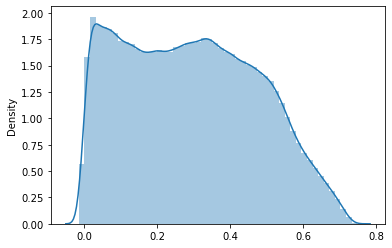

In [11]:
# 히스토그램 분포 그려보기.
# wave_0은 0에서 0.8 사이의 굴절율을 가짐.
sns.distplot(wave_0_df, kde=True) # 커널밀도
plt.show()

In [12]:
# 4개의 레이어가 모두 동일하게 각각 10을 단위로 10~ 300까지 30가지의 경우수를 가짐.
# 그래서 train_df의 크기가 81만 row를 가짐.(30 * 30 * 30 * 30)
print(train_df['layer_1'].unique())
print(train_df['layer_2'].unique())
print(train_df['layer_3'].unique())
print(train_df['layer_4'].unique())

[ 10  20  30  40  50  60  70  80  90 100 110 120 130 140 150 160 170 180
 190 200 210 220 230 240 250 260 270 280 290 300]
[ 10  20  30  40  50  60  70  80  90 100 110 120 130 140 150 160 170 180
 190 200 210 220 230 240 250 260 270 280 290 300]
[ 10  20  30  40  50  60  70  80  90 100 110 120 130 140 150 160 170 180
 190 200 210 220 230 240 250 260 270 280 290 300]
[ 10  20  30  40  50  60  70  80  90 100 110 120 130 140 150 160 170 180
 190 200 210 220 230 240 250 260 270 280 290 300]


In [13]:
# 샘플 데이터 추출
# layer1에 대한 정보만 우선 추출.
# layer1,2,3,4의 조합이여서 같은 두께에 대해 여러 값들이 존재함. 
# 같은 두께에 대해 하나로 집계할 필요성이 있음.
layer1_sample_df = train_df[['layer_1','0','1','2','3','4','5','6','7','8','9','10']] # , '220', '221', '222','223','224','225']
layer1_sample_df.head()

,layer_1,0,1,2,3,4,5,6,7,8,9,10
0,10,0.254551,0.258823,0.254659,0.252085,0.247678,0.253614,0.246511,0.259407,0.260862,0.242524,0.253870
1,10,0.205062,0.225544,0.217758,0.202169,0.199633,0.207380,0.191318,0.195369,0.200536,0.197588,0.198726
2,10,0.189196,0.165869,0.177655,0.156822,0.175094,0.177755,0.157582,0.158885,0.156911,0.166162,0.148831
3,10,0.131003,0.120076,0.138975,0.117931,0.130566,0.131262,0.126962,0.134453,0.106717,0.127309,0.099958
4,10,0.091033,0.086893,0.108125,0.080405,0.105917,0.077083,0.097895,0.086765,0.078676,0.075729,0.086023


In [14]:
# layer1의 두께별로 반사율값을 평균치 집계
sample_df_agg = layer1_sample_df.groupby('layer_1').agg('mean')
sample_df_agg.head()

,0,1,2,3,4,5,6,7,8,9,10
layer_1,,,,,,,,,,,
10,0.235445,0.235704,0.235760,0.235902,0.236068,0.236278,0.236528,0.236722,0.237170,0.237520,0.237659
20,0.244268,0.244486,0.244490,0.244654,0.244835,0.244967,0.245203,0.245433,0.245785,0.246013,0.246272
30,0.257980,0.258073,0.258292,0.258369,0.258518,0.258748,0.258881,0.259243,0.259681,0.259994,0.260231
40,0.274421,0.274604,0.274882,0.275071,0.275263,0.275498,0.275808,0.276241,0.276693,0.277083,0.277484
50,0.292036,0.292293,0.292454,0.292815,0.293173,0.293405,0.293730,0.294250,0.294816,0.295265,0.295646


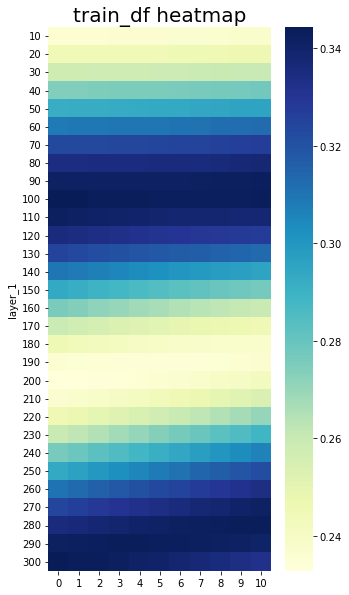

In [15]:
# 위에서 집게한 값을 히트맵으로 시각화해봄

# x : 파장넘버, y: 박막 두께.
# 파장 0,1에 대해layer_1의 박막두께에 따른 평균적인 반사율값.
# 박막두께가 100, 300 에서 높은 반사율. 10, 200에서는 낮은 반사율을 보여줌.
plt.rcParams["figure.figsize"] = (5,10)
sns.heatmap(sample_df_agg, cmap='YlGnBu') # , ax=ax)
plt.title('train_df heatmap', fontsize=20)
plt.show()

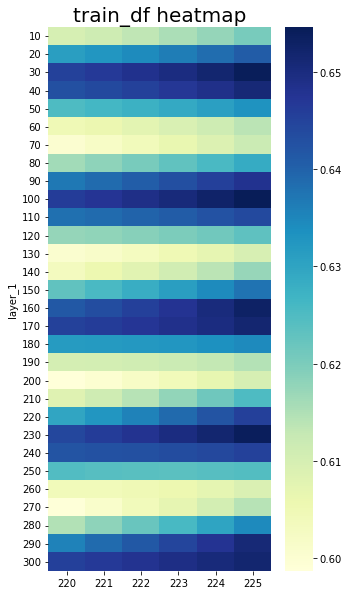

In [16]:
# 220~225
layer1_sample_df_tail = train_df[['layer_1','220', '221', '222','223','224','225']]
layer1_sample_df_tail_agg = layer1_sample_df_tail.groupby('layer_1').agg('mean')
# sample_df_agg.head()

plt.rcParams["figure.figsize"] = (5,10)
sns.heatmap(layer1_sample_df_tail_agg, cmap='YlGnBu') # , ax=ax)
plt.title('train_df heatmap', fontsize=20)
plt.show()
# 파장이 클수록 반사율이 높게나옴.
# 레이어 두께가 70을 간격으로 보여짐.

# 여기까지 결론은, 두께가 얇으면 투과율이 높아서 반사율이 상대적으로 낮고, 두께가 크면 반사율이 높다는 특징을 확인.

In [17]:
layer1_sample_df

,layer_1,0,1,2,3,4,5,6,7,8,9,10
0,10,0.254551,0.258823,0.254659,0.252085,0.247678,0.253614,0.246511,0.259407,0.260862,0.242524,0.253870
1,10,0.205062,0.225544,0.217758,0.202169,0.199633,0.207380,0.191318,0.195369,0.200536,0.197588,0.198726
2,10,0.189196,0.165869,0.177655,0.156822,0.175094,0.177755,0.157582,0.158885,0.156911,0.166162,0.148831
3,10,0.131003,0.120076,0.138975,0.117931,0.130566,0.131262,0.126962,0.134453,0.106717,0.127309,0.099958
4,10,0.091033,0.086893,0.108125,0.080405,0.105917,0.077083,0.097895,0.086765,0.078676,0.075729,0.086023
...,...,...,...,...,...,...,...,...,...,...,...,...
809995,300,0.349513,0.342661,0.326351,0.274503,0.253076,0.200509,0.159043,0.094644,0.074915,0.054888,0.055714
809996,300,0.305650,0.295621,0.256275,0.220107,0.164272,0.116024,0.078614,0.041309,0.043083,0.037534,0.079834
809997,300,0.256986,0.236297,0.185514,0.127390,0.098014,0.038709,0.032116,0.014756,0.064815,0.103352,0.177947
809998,300,0.213730,0.177011,0.125791,0.080640,0.036302,0.007403,0.035937,0.043684,0.110988,0.178333,0.265601


#### Base Model 생성

- feature : wavenumber 파장번호(categorical), reflect_ratio 반사율(numaric)
- label ; layer1~4 각각의 두께값
    - 우선 하나씩 두께를 구하는 베이스 예측모델 생성

In [18]:
# 이제부터는 모델을 돌리기 위해 데이터를 변환하는 과정을 거침.
# layer1에 대해서 우선 멜팅.
layer1_melt_df = pd.melt(layer1_sample_df, id_vars=['layer_1'],
                        var_name='wave', value_name='reflect_ratio')
layer1_melt_df

,layer_1,wave,reflect_ratio
0,10,0,0.254551
1,10,0,0.205062
2,10,0,0.189196
3,10,0,0.131003
4,10,0,0.091033
...,...,...,...
8909995,300,10,0.055714
8909996,300,10,0.079834
8909997,300,10,0.177947
8909998,300,10,0.265601


In [19]:
layer1_melt_df['wave'].value_counts()

3     810000
10    810000
9     810000
1     810000
8     810000
2     810000
4     810000
0     810000
5     810000
7     810000
6     810000
Name: wave, dtype: int64

In [20]:
# layer1,2,3,4를 기준으로 파장번호와 반사율을 멜팅함.
train_melting_df = pd.melt(train_df, id_vars=['layer_1','layer_2','layer_3','layer_4'],
                        var_name='wavenumber', value_name='reflect_ratio')

In [21]:
train_melting_df.head()

,layer_1,layer_2,layer_3,layer_4,wavenumber,reflect_ratio
0,10,10,10,10,0,0.254551
1,10,10,10,20,0,0.205062
2,10,10,10,30,0,0.189196
3,10,10,10,40,0,0.131003
4,10,10,10,50,0,0.091033


In [22]:
# 각 레이어별로 평균적인 wavenumber별 반사율의 평균 집계값을 히트맵으로 표현

layer1_df = train_melting_df[['layer_1','wavenumber','reflect_ratio']]
#layer2_df = train_melting_df[['layer_2','wavenumber','reflect_ratio']]
#layer3_df = train_melting_df[['layer_3','wavenumber','reflect_ratio']]
#layer4_df = train_melting_df[['layer_4','wavenumber','reflect_ratio']]

In [24]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression # 선형회귀 모델
from sklearn.metrics import mean_absolute_error #MAE

y_target = layer1_df['layer_1'] # y_target
X_data = layer1_df.drop(['layer_1'], axis=1, inplace=False) # X_data
# train:70 / test: 30
#X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.3, random_state=112) 

MemoryError: Unable to allocate 1.36 GiB for an array with shape (183060000, 1) and data type object